In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
dataset = pd.read_csv("Data Collection.csv")

rows = list(dataset.axes[0])
columns = list(dataset.axes[1])
print('Row Count: ', len(rows))
print('Column Count: ', len(columns))

dataset.head()

Row Count:  150
Column Count:  8


,Speaker,Gender,Word,Phoneme,Time,Formant1,Formant2,Formant3
0,alw001,F,heed,IY,0.931746,380.739503,2523.079518,3234.430697
1,alw001,F,hid,IH,2.014639,479.727255,2715.679948,3338.660600
2,alw001,F,head,EH,3.003640,735.340230,2300.468502,3159.912711
3,cxb001,F,heed,IY,0.828268,355.837818,2821.359346,3911.313367
4,cxb001,F,hid,IH,1.415768,360.737197,2849.009182,3259.985862


Text(0.5, 1.03, 'Distributions of Formants')

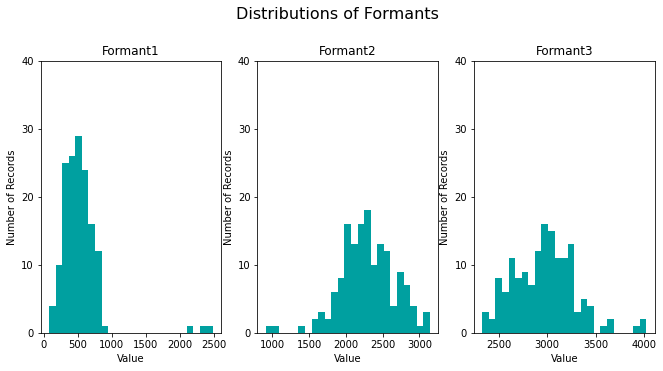

In [3]:
# Create figure
fig = plt.figure(figsize=(11, 5))
gs = gridspec.GridSpec(1, 3)
# Skewed feature plotting
for i, feature in enumerate(['Formant1', 'Formant2', 'Formant3']):
    ax = plt.subplot(gs[0, i]) #
    ax.hist(dataset[feature], bins=25, color='#00A0A0')
    ax.set_title(feature)#, fontsize=14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of Records")
    ax.set_ylim((0, 40))
    ax.set_yticks([0, 10, 20, 30, 40])

# Plot aesthetics
fig.suptitle("Distributions of Formants", fontsize=16, y=1.03)

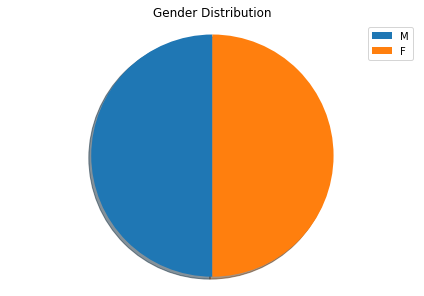

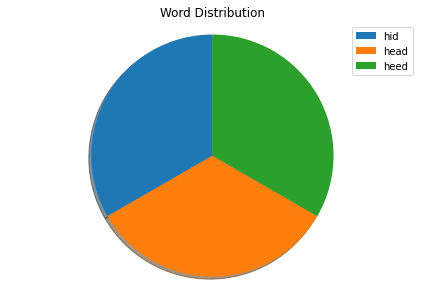

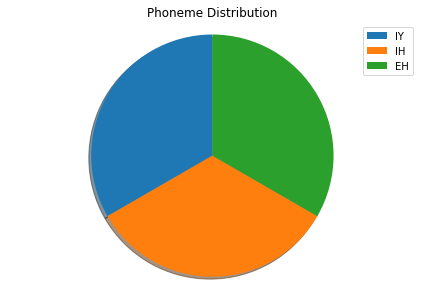

In [4]:
def FeatureDistribution(df:pd.DataFrame, feature:str):
    # Visualizing Activity Distribution
    temp = df[feature].value_counts()
    df = pd.DataFrame({'labels': temp.index,
                       'values': temp.values
                      })

    labels = df['labels']
    sizes = df['values']
    patches, texts = plt.pie(sizes, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.title(feature + " Distribution")
    plt.show()

FeatureDistribution(dataset, "Gender")
FeatureDistribution(dataset, "Word")
FeatureDistribution(dataset, "Phoneme")

In [5]:
phoneme_encode =    {
                        "IY":0,
                        "IH":1,
                        "EH":2,
                    }

word_encode =   {
                    "heed":0,
                    "hid":1,
                    "head":2,
                }

gender_encode = {
                    "F": 0,
                    "M": 1
                }

In [6]:
dataset['Word'] = dataset['Word'].map(word_encode)
dataset['Gender'] = dataset['Gender'].map(gender_encode)
dataset['Phoneme'] = dataset['Phoneme'].map(phoneme_encode)

In [7]:
phenome = dataset['Phoneme']
dataset = pd.DataFrame(dataset.drop(['Speaker', 'Time', 'Phoneme'],axis=1))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset, phenome, test_size=0.25, random_state=0)
